# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [17]:
import numpy as np
from matplotlib import pyplot as plt

def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    x = x0 
    x_n = x0 - 1 
    n = 0 
    while abs(x - x_n) >= eps:
        x_n = x 
        x  = x - f(x) / fder(x) 
        n = n + 1  
        if n == maxiter:
            break
    return x, n

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [18]:
def f(x):
    return x ** 2 - 1
def fder(x):
    return 2 * x

for x0 in np.arange(-100 + 0.01 , 100 + 0.01 , 10):
    print('Первоначальное значение x0 : {}'.format(x0))
    root, nof_i = newton_iteration(f, fder, x0)
    print('Корень: {}, кол-во итераций: {}'.format(root, nof_i))

Первоначальное значение x0 : -99.99
Корень: -1.0, кол-во итераций: 11
Первоначальное значение x0 : -89.99
Корень: -1.0, кол-во итераций: 11
Первоначальное значение x0 : -79.99
Корень: -1.0000000000151748, кол-во итераций: 10
Первоначальное значение x0 : -69.99
Корень: -1.000000000000391, кол-во итераций: 10
Первоначальное значение x0 : -59.989999999999995
Корень: -1.0000000000000029, кол-во итераций: 10
Первоначальное значение x0 : -49.989999999999995
Корень: -1.0, кол-во итераций: 10
Первоначальное значение x0 : -39.989999999999995
Корень: -1.000000000015066, кол-во итераций: 9
Первоначальное значение x0 : -29.989999999999995
Корень: -1.0000000000000029, кол-во итераций: 9
Первоначальное значение x0 : -19.989999999999995
Корень: -1.000000000014731, кол-во итераций: 8
Первоначальное значение x0 : -9.989999999999995
Корень: -1.0000000000136322, кол-во итераций: 7
Первоначальное значение x0 : 0.010000000000005116
Корень: 1.0, кол-во итераций: 11
Первоначальное значение x0 : 10.0100000000

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [19]:
def newton_iteration_m (f, fder, x0, m=1, eps=1e-5, maxiter=1000):
    x = x0
    for i in range(maxiter):
        step = f(x) / fder(x)
        if (abs(step) <= abs(eps * x)):
            return (x, i)
        else:
            x -= m * step
    return (x, i)

def f_2(x):
    return (x**2 - 1)**2
def fder_2(x):
    return (2*(x**2 - 1)*2*x)

for i in [-6, 12]:
    for j in range(1, 6):
        print('Первоначальное значение x0 : {} , m = {}'.format(i, j))
        root, nof_i = newton_iteration_m(f_2, fder_2, i, j)
        print('Корень: {}, кол-во итераций: {} '.format(root, nof_i))

Первоначальное значение x0 : -6 , m = 1
Корень: -1.0000180390187419, кол-во итераций: 21 
Первоначальное значение x0 : -6 , m = 2
Корень: -1.0000000008888648, кол-во итераций: 6 
Первоначальное значение x0 : -6 , m = 3
Корень: -1.0000182268399191, кол-во итераций: 15 
Первоначальное значение x0 : -6 , m = 4
Корень: -5.999999999999989, кол-во итераций: 999 
Первоначальное значение x0 : -6 , m = 5
Корень: 0.5055759965313339, кол-во итераций: 999 
Первоначальное значение x0 : 12 , m = 1
Корень: 1.0000122444095771, кол-во итераций: 24 
Первоначальное значение x0 : 12 , m = 2
Корень: 1.0000000010340573, кол-во итераций: 7 
Первоначальное значение x0 : 12 , m = 3
Корень: 1.000010168305124, кол-во итераций: 12 
Первоначальное значение x0 : 12 , m = 4
Корень: 11.99999999999966, кол-во итераций: 999 
Первоначальное значение x0 : 12 , m = 5
Корень: 0.8576159619263376, кол-во итераций: 999 


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

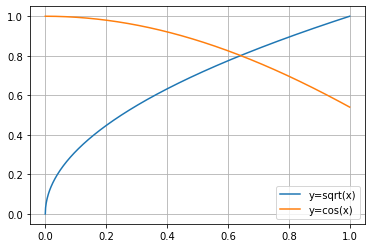

In [20]:

x = np.linspace(0, 1, num = 1000)


plt.plot(x, np.sqrt(x), label='y=sqrt(x)' )
plt.plot(x, np.cos(x), label='y=cos(x)' )
plt.grid()
plt.legend()
plt.show()

In [30]:
def fixed_point(f, x0, eps=1e-5, maxiter=1000):
    x = x0
    x_n = x0 - 1
    n = 0
    while abs(x - x_n) >= eps:
        x_n = x #saving the previous value, as done before
        x = x - f(x) 
        n = n + 1  
        if n == maxiter:
            break   
    return x, n

def f(x):
    return np.sqrt(x) - np.cos(x) 

x, n = fixed_point(f, 0.7)

print('Корень: {}, кол-во итераций: {} '.format(x, i))

Корень: 0.6417127314101916, кол-во итераций: 12 


In [35]:
def fixed_point_alf(f, x0, alpha, eps=1e-5, maxiter=1000):
    x = x0
    for i in range(maxiter):
        if (abs(alpha*f(x)) <= eps):
            return x, i
        else:
            x -= alpha*f(x)
    return x, i

def f_fixed_point_alf(x):
    return x - np.cos(x)**2

def f_der_fixed_point_alf(x):
    return 1 + 2*np.cos(x)*np.sin(x)

a_array = np.linspace(2, 0, 10)[:-1]

for a in a_array:
    x_root, nof_i = fixed_point_alf(f_fixed_point_alf, 0.2, a)
    print('Альфа: {:.2f}, Корень: {}, кол-во итераций:'.format(a, x_root, nof_i))
a_best = 2 / (f_der_fixed_point_alf(0.5) + f_der_fixed_point_alf(0.7))
x_root, nof_i = fixed_point_enh(f_fixed_point_enh, 0.2, a_best)
print('Лучшая альфа: {:.2f}, Корень: {}, кол-во итераций: {} '.format(a_best, x_root, nof_i))

Альфа: 2.00, Корень: -1.5817833583772412, кол-во итераций:
Альфа: 1.78, Корень: -0.5755384249039934, кол-во итераций:
Альфа: 1.56, Корень: -0.33941089332303753, кол-во итераций:
Альфа: 1.33, Корень: -0.33753718287246026, кол-во итераций:
Альфа: 1.11, Корень: 0.12815763014791948, кол-во итераций:
Альфа: 0.89, Корень: 0.6417189927086574, кол-во итераций:
Альфа: 0.67, Корень: 0.6417195082757315, кол-во итераций:
Альфа: 0.44, Корень: 0.6417100780677919, кол-во итераций:
Альфа: 0.22, Корень: 0.6416962206087852, кол-во итераций:
Лучшая альфа: 0.52, Корень: 0.6417147884703004, кол-во итераций: 4 


# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.